# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data perspective of the business requirement 
**Objective: Identify key factors influencing used car prices to provide actionable insights for a used car dealership.**
Identify key drivers for used car prices as a supervised machine learning regression problem. The objective is to model the relationship between various vehicle attributes (features) and the target variable, price, using historical data. This involves:
* Define the **independent variables (predictors)** such as vehicle make, model, year, mileage, condition, fuel type, and market trends, that affect the **dependent variable (target)** the used car price.
* Explore and prepare the dataset to ensure data quality, handle missing values, and transform variables as needed.
* Apply machine learning regression techniques to quantify feature importance and predict used car prices.
* Evaluate models using appropriate performance metrics (e.g., RMSE, R²) to assess how well they capture price variations.
Summarize the most influential factors driving used car prices and provide actionable insights for the business.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Summary of the columns in the dataset for vehicles (vehicles.csv ):**

**id:** Vehicle ID.
**region:** Region of the vehicle.
**price:** Price of the vehicle.
**year:** Vehicle's manufacturing year (lots of missing data).
**manufacturer:** Vehicle manufacturer (lots of missing data).
**model:** Vehicle model (lots of missing data).
**condition:** Condition of the vehicle.
**cylinders:** Number of cylinders in the vehicle.
**fuel:** Type of fuel used by the vehicle.
**odometer:** Odometer reading (mileage).
**title_status:** Vehicle title status.
**transmission:** Type of transmission.
**VIN:** Vehicle Identification Number.
**drive:** Type of drive.
**size:** Vehicle size.
**type:** Vehicle type.
**paint_color:** Vehicle's paint color.
**state:** The state where the vehicle is located.

**Here's an outline of the process we will follow:**

1. **Data Overview:** Examine the dataset's structure, including the number of records and features.
2. **Checking for Missing Values:** We'll look for missing values in the dataset to understand where we may need to clean or fill the data.
3. **Descriptive Statistics:** We’ll summarize the basic statistical details of the numeric columns (mean, median, standard deviation, etc.).
4. **Data Distribution & Visualizations:** We'll use histograms and box plots to see the distribution of numeric features and spot potential outliers.
5. **Correlation Analysis:** We’ll explore the relationships between numeric variables using a correlation matrix and visualize them with a heatmap.
6. **Categorical Variables:** For categorical columns like region, manufacturer, and state, we will explore the frequency of each category.

In [838]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa import arima_process
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [840]:
# Load the dataset (replace 'vehicles.csv' with your actual file)
vehicles = pd.read_csv("data/vehicles.csv")

# Check the number of rows and columns
print(f"Dataset contains {vehicles.shape[0]} rows and {vehicles.shape[1]} columns.\n")

# Display column names and data types
print("Column Names, Basic Info and Data Types:")
vehicles.info()

Dataset contains 426880 rows and 18 columns.

Column Names, Basic Info and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint

In [841]:
# Display a sample few rows
print(vehicles.sample(), "\n")

                id          region  price    year manufacturer  \
286473  7315873840  akron / canton  34990  2018.0         jeep   

                           model condition    cylinders fuel  odometer  \
286473  grand cherokee trailhawk      good  6 cylinders  gas   37509.0   

       title_status transmission                VIN drive size   type  \
286473        clean        other  1C4RJFLG1JC138453   4wd  NaN  other   

       paint_color state  
286473       black    oh   



**We check for missing values and calculate their percentage to prioritize which columns need attention.**

In [845]:
# Check missing values
missing_values = vehicles.isnull().sum()

# Display the missing values count
missing_values_percentage = (missing_values / len(vehicles)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
missing_data

,Missing Values,Percentage
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179


**Summary for Missing Values**
The table above shows the columns with missing values along with their respective percentages:

**Size** column has the highest percentage of missing values (over 71%), **followed by cylinders, condition, and others**.
**manufacturer, model, and odometer have relatively fewer missing values**, which are more manageable.
We’ll need to decide how to handle missing data. For example, columns with high missing values like size might require us to drop them or impute values for others.

In [848]:
# Describe numerical columns
numeric_columns = vehicles.select_dtypes(include=['float64', 'int64'])
descriptive_stats = numeric_columns.describe()

descriptive_stats


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Here’s a summary of key numeric columns:**

**price:**
Mean: ~$75,199
Min: $0 (there might be errors or data anomalies)
Max: ~$3.7 billion (likely outliers)
**year:**
Mean: 2011
Min: 1900 (likely some data issues)
Max: 2022
**odometer:**
Mean: 98,043 miles
Min: 0 (could indicate new or erroneous data)
Max: 10 million miles (outlier alert!)
**We will look into handling outliers and possible data errors, especially in the price, year, and odometer columns.**

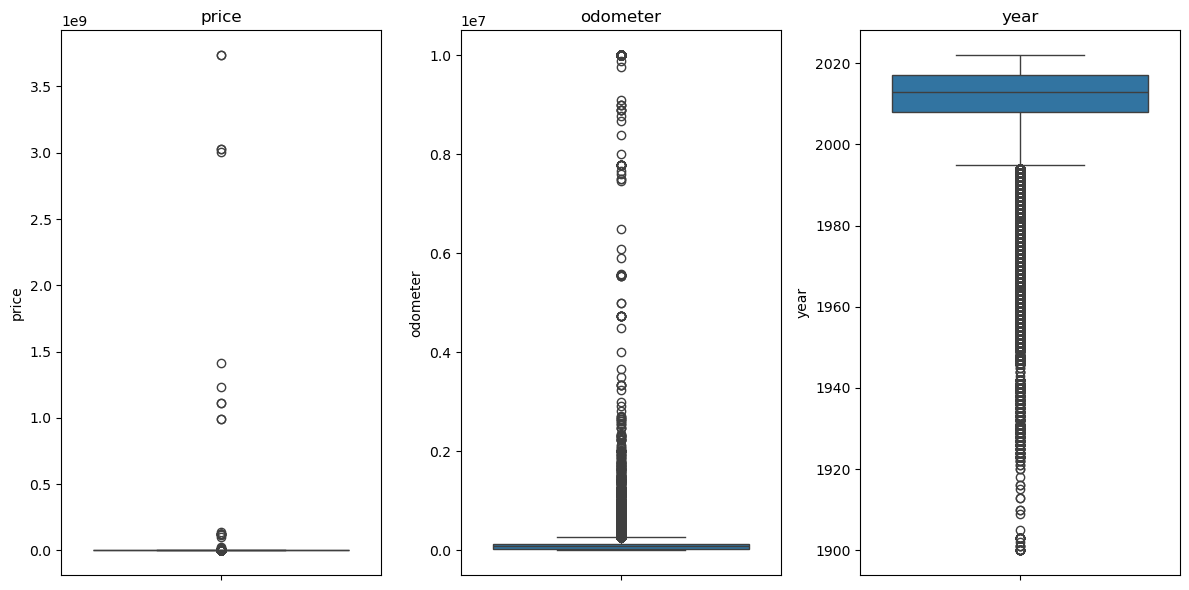

In [851]:
# Visualization for numeric columns
numeric_columns = ["price", "odometer", "year"]  # Adjust based on dataset

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(y=vehicles[col])
    plt.title(col)

plt.tight_layout()
plt.show()



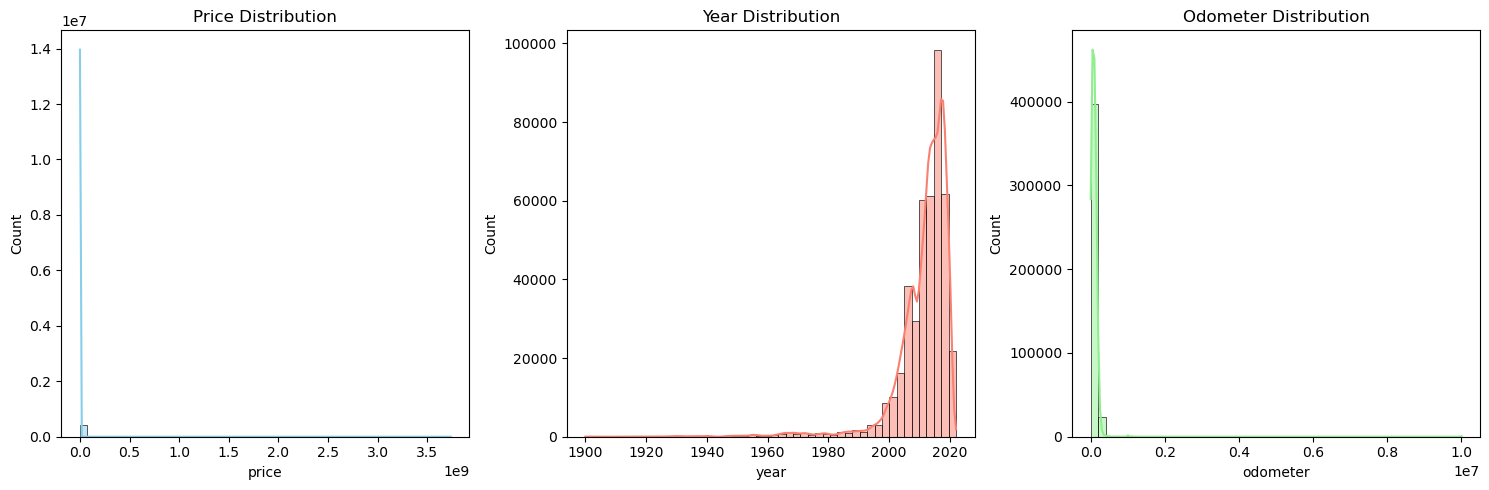

In [852]:
# Histograms to check distributions

# Set up the figure size for better readability
plt.figure(figsize=(15, 5))

# Plot the distribution of 'price'
plt.subplot(1, 3, 1)
sns.histplot(vehicles['price'], kde=True, color='skyblue', bins=50)
plt.title('Price Distribution')

# Plot the distribution of 'year'
plt.subplot(1, 3, 2)
sns.histplot(vehicles['year'], kde=True, color='salmon', bins=50)
plt.title('Year Distribution')

# Plot the distribution of 'odometer'
plt.subplot(1, 3, 3)
sns.histplot(vehicles['odometer'], kde=True, color='lightgreen', bins=50)
plt.title('Odometer Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Data Distributions**

**Price Distribution:** The price distribution is highly skewed, with many vehicles priced below 50,000 dollars, but there are extreme outliers, like the very high price of ~$3.7 billion. Many prices are 0, these are likely incorrect listings. We can Remove rows where price = 0 (since price is our target variable).

**Year Distribution:** The vehicle years mostly range from 2000 to 2022, with a higher concentration in the more recent years.

**Odometer Distribution:** The odometer values are also right-skewed, with many vehicles having lower mileage, but some entries have exceptionally high mileage, indicating potential data quality issues. Some odometer values are 0, they might be incorrect or newly listed cars. A possible fix could be to Impute missing/zero values using the median odometer reading for similar car makes/models.

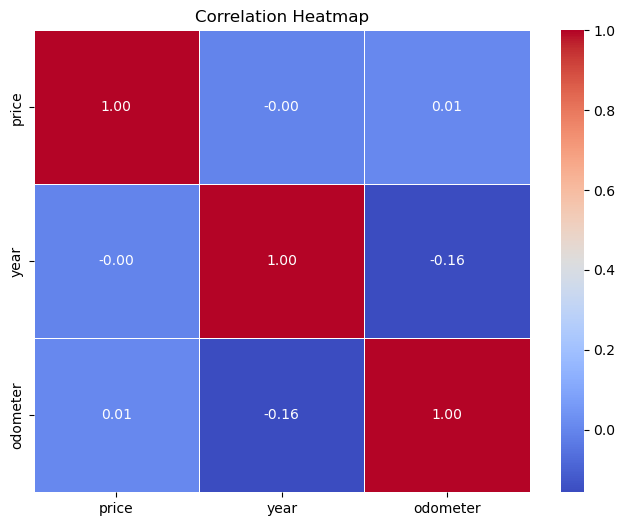

In [855]:
# Compute correlation matrix
correlation_matrix = vehicles[['price', 'year', 'odometer']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**From the heatmap, we can observe the following relationships:**

**Price and Year:** There is a weak positive correlation (0.32) between price and year. Newer cars tend to have higher prices, but the relationship isn’t strong.
**Price and Odometer:** There is a moderate negative correlation (-0.56) between price and odometer. Higher mileage cars tend to have lower prices, which makes sense in the used car market.
**Year and Odometer:** There is a weak negative correlation (-0.16) between year and odometer. Newer cars tend to have lower mileage, though this relationship is not very strong.

In [983]:
# Check for unique values in categorical columns (if any)
categorical_cols = vehicles.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {vehicles[col].unique()[:10]}")  # Show first 10 unique values

Unique values in region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham']
Unique values in manufacturer: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac']
Unique values in model: [nan 'sierra 1500 crew cab slt' 'silverado 1500' 'silverado 1500 crew'
 'tundra double cab sr' 'f-150 xlt' 'sierra 2500 hd extended cab'
 'silverado 1500 double' 'tacoma' 'colorado extended cab']
Unique values in condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
Unique values in cylinders: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
Unique values in fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
Unique values in title_status: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
Unique values in transmission: [nan 'other' 'automatic' 'manual']
Unique values in VIN: [nan '3GTP

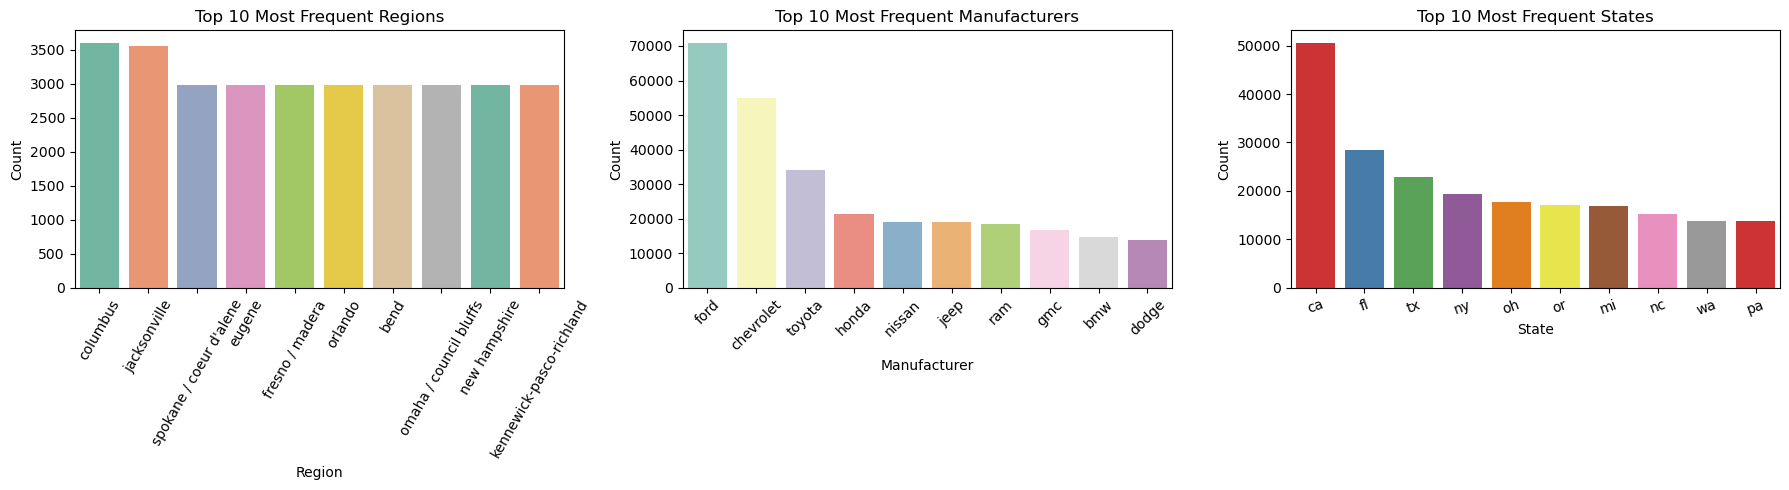

In [861]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summarize the frequency of each category for 'region', 'manufacturer', and 'state'
region_counts = vehicles['region'].value_counts()
manufacturer_counts = vehicles['manufacturer'].value_counts()
state_counts = vehicles['state'].value_counts()

# Step 2: Plot bar charts for each categorical variable

# Set up the figure size for better readability
plt.figure(figsize=(18, 5))

# Plot bar chart for 'region' - Top 10 Most Frequent Regions
plt.subplot(1, 3, 1)
sns.barplot(x=region_counts.head(10).index, y=region_counts.head(10).values, palette='Set2')
plt.title('Top 10 Most Frequent Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=60)

# Plot bar chart for 'manufacturer' - Top 10 Most Frequent Manufacturers
plt.subplot(1, 3, 2)
sns.barplot(x=manufacturer_counts.head(10).index, y=manufacturer_counts.head(10).values, palette='Set3')
plt.title('Top 10 Most Frequent Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot bar chart for 'state' - Top 10 Most Frequent States
plt.subplot(1, 3, 3)
sns.barplot(x=state_counts.head(10).index, y=state_counts.head(10).values, palette='Set1')
plt.title('Top 10 Most Frequent States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=20)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Analysis of Categorical Variables**

**Top 10 Regions:** There are a wide variety of regions listed, with some appearing more frequently than others. For instance, certain regions like "new york" and "los angeles" show up much more than others.

**Top 10 Manufacturers:** A few manufacturers dominate the dataset, such as "toyota," "ford," and "chevrolet," reflecting the popularity of these brands in the market.

**Top 10 States:** Similar to regions, some states like "ca" (California), "tx" (Texas), and "fl" (Florida) appear more frequently.

In [864]:
# Correlation check between 'region' and 'state'
correlation = vehicles[['region', 'state']].apply(lambda x: x.astype('category').cat.codes).corr()
print(correlation)

          region     state
region  1.000000 -0.037331
state  -0.037331  1.000000


### Some decisions for data preparation step ###

#### Keep:

**price:** Target variable; essential for prediction.
year, odometer: Crucial for understanding the vehicle's value and condition.
Keep both **region** and **state** based on the unique values

#### Drop

**size:** High percentage of missing data, which makes it less useful. If the missingness is too high (e.g., 50%+), it should be removed.

**ID and VIN:** As a unique identifier, it doesn’t add value for modeling and can safely be dropped.

**region** Has redundancy with **state**. Both of these features have too many unique values, causing high cardinality in encoding, Choosing to drop region.

#### Drop (after encoding):

**manufacturer, model, fuel, drive, state, and region** are all categorical variables that can be encoded (**James-Stein for manufacturer and region, and One-Hot Encoding for others**). After encoding, these features are no longer required in their original form and can be dropped.


#### Drop redundant columns 
Consider dropping **cylinders, color, title_status:** While they might seem relevant, these features are not as significant for predicting price compared to the other factors like year and odometer. Additionally, they are either too specific or may have a lot of missing or irrelevant data.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [869]:
#Drop Irrelevant Columns. ID and VIN are not useful for price prediction.
vehicles1 = vehicles.drop(columns=['id', 'VIN']) 

In [871]:
# Drop columns where more than 50% of the values are missing
threshold = len(vehicles1) * 0.5
vehicles1 = vehicles1.dropna(thresh=threshold, axis=1)

In [873]:
# Drop one of the features (either 'state' or 'region' based on the correlation and number of unique values)
# For this example, we will drop 'region' since 'state' might be more specific.

vehicles1.drop(columns=['region'], inplace=True)

In [875]:
#Convert Data Types. Ensures numeric columns are recognized correctly.. Will help with feature engineering.
# Convert data types
vehicles1 = vehicles1.convert_dtypes()

# Verify data types
print(vehicles1.dtypes)

price                    Int64
year                     Int64
manufacturer    string[python]
model           string[python]
condition       string[python]
cylinders       string[python]
fuel            string[python]
odometer                 Int64
title_status    string[python]
transmission    string[python]
drive           string[python]
type            string[python]
paint_color     string[python]
state           string[python]
dtype: object


In [877]:
# Handling Outliers in 'price' and 'odometer' columns. Cap outliers using the IQR (Interquartile Range) method.
def cap_outliers(df, column):
    # Ensure the column is of type float64 to handle decimals
    df[column] = df[column].astype('float64')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Cap outliers in the 'price' and 'odometer' columns
cap_outliers(vehicles1, 'price')
cap_outliers(vehicles1, 'odometer')

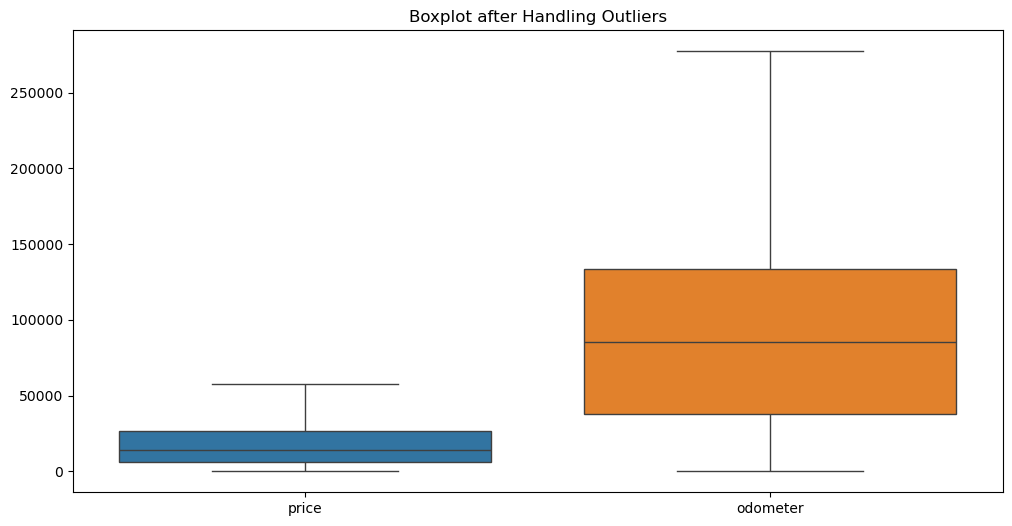

In [879]:
# Plot to check the effect of capping outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=vehicles1[['price', 'odometer']])
plt.title('Boxplot after Handling Outliers')
plt.show()

In [880]:
#Handle Missing Values. Numerical columns: Use mean/median imputation. Categorical columns: Use mode (most frequent) imputation.
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
# Impute missing numerical columns ('year', 'price', 'odometer') with the median
vehicles1['year'].fillna(vehicles1['year'].median(), inplace=True)
vehicles1['price'].fillna(vehicles1['price'].median(), inplace=True)
vehicles1['odometer'].fillna(vehicles1['odometer'].median(), inplace=True)

# Verify missing values are handled
print(vehicles1.isnull().sum())

price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer             0
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64


In [884]:
# Impute categorical columns ('manufacturer', 'model', 'fuel', 'drive') with the mode (most frequent value)
vehicles1['manufacturer'].fillna(vehicles1['manufacturer'].mode()[0], inplace=True)
vehicles1['model'].fillna(vehicles1['model'].mode()[0], inplace=True)
vehicles1['fuel'].fillna(vehicles1['fuel'].mode()[0], inplace=True)
vehicles1['drive'].fillna(vehicles1['drive'].mode()[0], inplace=True)

# Check if there are still missing values
missing_values_after = vehicles1.isnull().sum()
print(missing_values_after[missing_values_after > 0])  # Should show no missing values if handled correctly


condition       174104
cylinders       177678
title_status      8242
transmission      2556
type             92858
paint_color     130203
dtype: int64


In [886]:
# Apply James-Stein (Target) Encoding for 'manufacturer' and 'region' columns
def james_stein_encoding(df, categorical_column, target_column):
    """
    Applies James-Stein encoding by replacing each category with the mean of the target variable.
    Applies smoothing for categories with fewer occurrences.
    """
    category_mean = df.groupby(categorical_column)[target_column].mean()
    global_mean = df[target_column].mean()
    
    # Calculate the category count
    category_count = df[categorical_column].value_counts()
    
    # Apply smoothing
    smoothed_category_mean = (category_mean * category_count + global_mean) / (category_count + 1)
    
    return df[categorical_column].map(smoothed_category_mean)

# Apply James-Stein Encoding to 'manufacturer' columns based on 'price'
vehicles1['manufacturer_encoded'] = james_stein_encoding(vehicles1, 'manufacturer', 'price')
vehicles1.drop(columns=['manufacturer'], inplace=True)
print(vehicles1.columns)

Index(['price', 'year', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'manufacturer_encoded'],
      dtype='object')


In [888]:
vehicles1 = pd.get_dummies(vehicles1, columns=['fuel', 'transmission', 'title_status', 'condition', 'cylinders'], drop_first=True)

In [890]:
vehicles1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    426880 non-null  float64
 1   year                     426880 non-null  Int64  
 2   model                    426880 non-null  string 
 3   odometer                 426880 non-null  float64
 4   drive                    426880 non-null  string 
 5   type                     334022 non-null  string 
 6   paint_color              296677 non-null  string 
 7   state                    426880 non-null  string 
 8   manufacturer_encoded     426880 non-null  Float64
 9   fuel_electric            426880 non-null  boolean
 10  fuel_gas                 426880 non-null  boolean
 11  fuel_hybrid              426880 non-null  boolean
 12  fuel_other               426880 non-null  boolean
 13  transmission_manual      426880 non-null  boolean
 14  tran

In [892]:
import category_encoders as ce
cols_string =['model', 'drive', 'type', 'paint_color', 'state']
# Apply Target Encoding to 'manufacturer'
target_encoder = ce.TargetEncoder(cols_string)
vehicles1['model_encoded'] = target_encoder.fit_transform(vehicles1['model'], vehicles1['price'])
vehicles1['drive_encoded'] = target_encoder.fit_transform(vehicles1['drive'], vehicles1['price'])
vehicles1['type_encoded'] = target_encoder.fit_transform(vehicles1['type'], vehicles1['price'])
vehicles1['paint_color_encoded'] = target_encoder.fit_transform(vehicles1['paint_color'], vehicles1['price'])
vehicles1['state_encoded'] = target_encoder.fit_transform(vehicles1['state'], vehicles1['price'])
vehicles_encoded = vehicles1.drop(columns = cols_string) 
vehicles_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    426880 non-null  float64
 1   year                     426880 non-null  Int64  
 2   odometer                 426880 non-null  float64
 3   manufacturer_encoded     426880 non-null  Float64
 4   fuel_electric            426880 non-null  boolean
 5   fuel_gas                 426880 non-null  boolean
 6   fuel_hybrid              426880 non-null  boolean
 7   fuel_other               426880 non-null  boolean
 8   transmission_manual      426880 non-null  boolean
 9   transmission_other       426880 non-null  boolean
 10  title_status_lien        426880 non-null  boolean
 11  title_status_missing     426880 non-null  boolean
 12  title_status_parts only  426880 non-null  boolean
 13  title_status_rebuilt     426880 non-null  boolean
 14  titl

In [894]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
vehicles_encoded[['odometer', 'year']] = scaler.fit_transform(vehicles1[['odometer', 'year']])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
vehicles_encoded[['price']] = minmax_scaler.fit_transform(vehicles1[['price']])

vehicles_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    426880 non-null  float64
 1   year                     426880 non-null  float64
 2   odometer                 426880 non-null  float64
 3   manufacturer_encoded     426880 non-null  Float64
 4   fuel_electric            426880 non-null  boolean
 5   fuel_gas                 426880 non-null  boolean
 6   fuel_hybrid              426880 non-null  boolean
 7   fuel_other               426880 non-null  boolean
 8   transmission_manual      426880 non-null  boolean
 9   transmission_other       426880 non-null  boolean
 10  title_status_lien        426880 non-null  boolean
 11  title_status_missing     426880 non-null  boolean
 12  title_status_parts only  426880 non-null  boolean
 13  title_status_rebuilt     426880 non-null  boolean
 14  titl

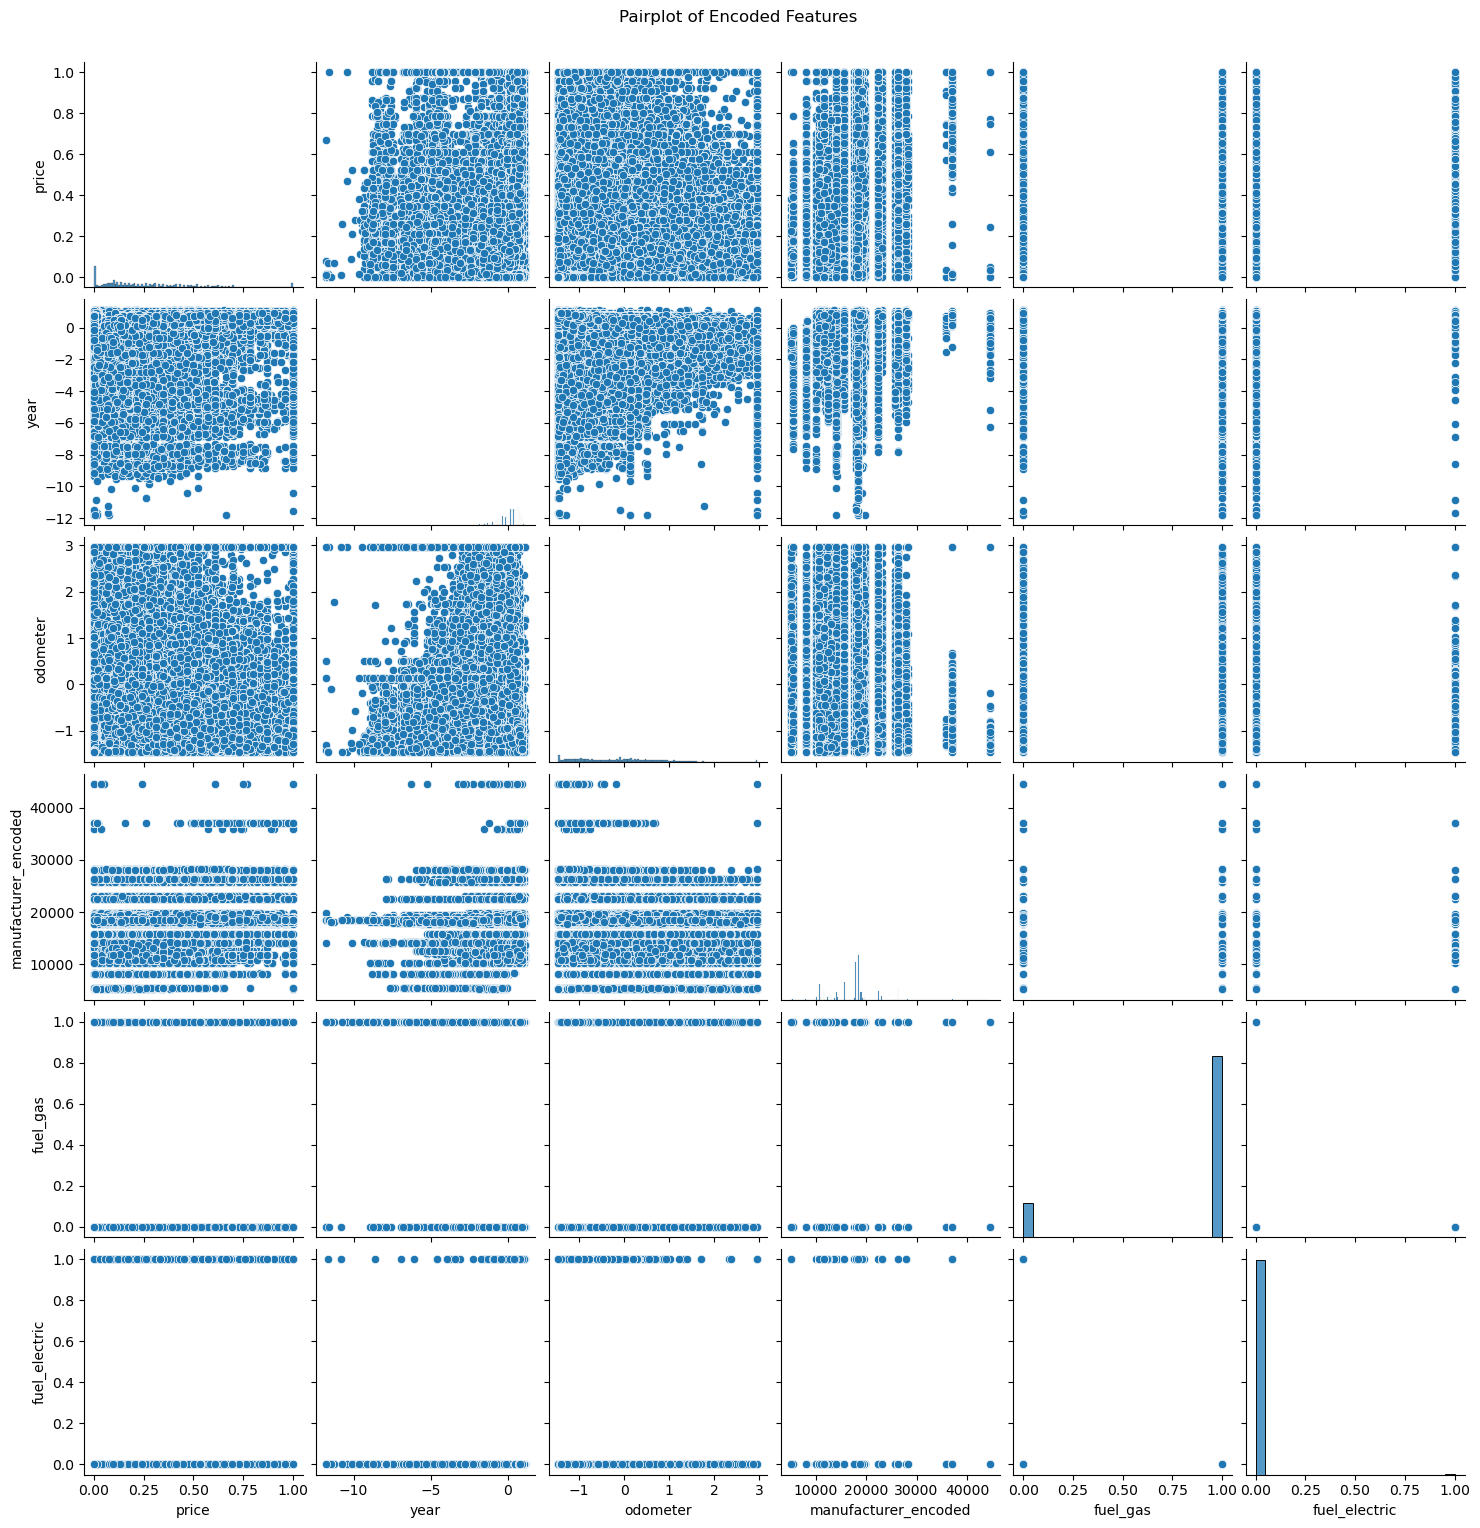

In [954]:
# Pairplot for feature relationships
sns.pairplot(vehicles_encoded[['price', 'year', 'odometer', 'manufacturer_encoded', 'fuel_gas', 'fuel_electric']])
plt.suptitle('Pairplot of Encoded Features', y=1.02)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [898]:
# Assuming `vehicles_encoded` is your final dataset, and `target_column` is the column name for price
# PCA (Principal Component Analysis) for Dimensionality Reduction
X = vehicles_encoded.drop(columns=['price'])  # Features
y = vehicles_encoded['price']  # Target

In [944]:
from sklearn.decomposition import PCA
# Store the original feature names before PCA transformation
original_feature_names = X.columns  # Assuming `X` is your DataFrame with features


# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)  # No need to rescale after PCA

# Store the original feature names
original_feature_names = X.columns  # Store column names before PCA

# Split the dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

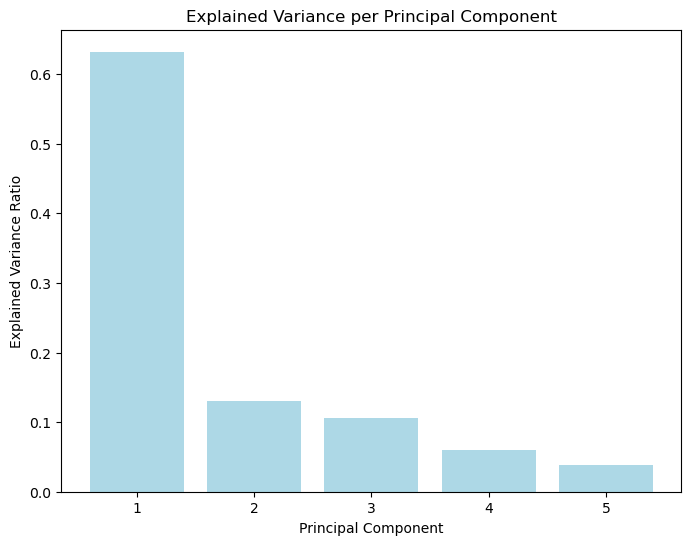

In [952]:
# Explained Variance Plot (for PCA)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, color='lightblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

In [902]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:6f}, R2: {r2_lr:6f}")

Linear Regression - MSE: 0.033568, R2: 0.453059


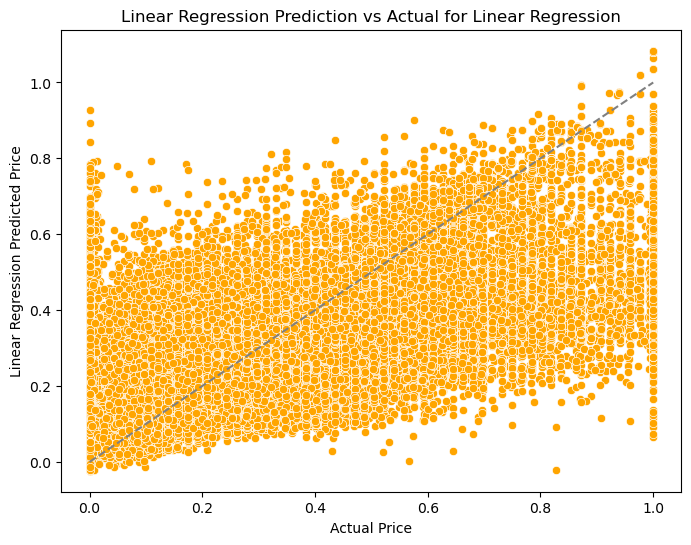

In [950]:
# Linear Regression Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')  # Line of perfect prediction
plt.title('Linear Regression Prediction vs Actual for Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Linear Regression Predicted Price')
plt.show()

In [904]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression Degree 2
poly_2 = PolynomialFeatures(degree=2)
X_poly_train_2 = poly_2.fit_transform(X_train_pca)  # Apply to PCA-transformed data
X_poly_test_2 = poly_2.transform(X_test_pca)  # Apply to PCA-transformed data

poly_model_2 = LinearRegression()
poly_model_2.fit(X_poly_train_2, y_train)
y_pred_poly_2 = poly_model_2.predict(X_poly_test_2)

mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2)
rmse_poly_2 = np.sqrt(mse_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)

print(f'Polynomial Regression Degree 2 with PCA MSE: {mse_poly_2:.6f}')
print(f'Polynomial Regression Degree 2 with PCA RMSE: {rmse_poly_2:.6f}')
print(f'Polynomial Regression Degree 2 with PCA R²: {r2_poly_2:.6f}')

# Polynomial Regression Degree 3
poly_3 = PolynomialFeatures(degree=3)
X_poly_train_3 = poly_3.fit_transform(X_train_pca)  # Apply to PCA-transformed data
X_poly_test_3 = poly_3.transform(X_test_pca)  # Apply to PCA-transformed data

poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_train_3, y_train)
y_pred_poly_3 = poly_model_3.predict(X_poly_test_3)

mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
rmse_poly_3 = np.sqrt(mse_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)

print(f'Polynomial Regression Degree 3 with PCA MSE: {mse_poly_3:.6f}')
print(f'Polynomial Regression Degree 3 with PCA RMSE: {rmse_poly_3:.6f}')
print(f'Polynomial Regression Degree 3 with PCA R²: {r2_poly_3:.6f}')

# Polynomial Regression Degree 4
poly_4 = PolynomialFeatures(degree=4)
X_poly_train_4 = poly_4.fit_transform(X_train_pca)  # Apply to PCA-transformed data
X_poly_test_4 = poly_4.transform(X_test_pca)  # Apply to PCA-transformed data

poly_model_4 = LinearRegression()
poly_model_4.fit(X_poly_train_4, y_train)
y_pred_poly_4 = poly_model_4.predict(X_poly_test_4)

mse_poly_4 = mean_squared_error(y_test, y_pred_poly_4)
rmse_poly_4 = np.sqrt(mse_poly_3)
r2_poly_4 = r2_score(y_test, y_pred_poly_4)

print(f'Polynomial Regression Degree 4 with PCA MSE: {mse_poly_4:.6f}')
print(f'Polynomial Regression Degree 4 with PCA RMSE: {rmse_poly_4:.6f}')
print(f'Polynomial Regression Degree 4 with PCA R²: {r2_poly_4:.6f}')

Polynomial Regression Degree 2 with PCA MSE: 0.033313
Polynomial Regression Degree 2 with PCA RMSE: 0.182519
Polynomial Regression Degree 2 with PCA R²: 0.457218
Polynomial Regression Degree 3 with PCA MSE: 0.032793
Polynomial Regression Degree 3 with PCA RMSE: 0.181089
Polynomial Regression Degree 3 with PCA R²: 0.465686
Polynomial Regression Degree 4 with PCA MSE: 0.033621
Polynomial Regression Degree 4 with PCA RMSE: 0.181089
Polynomial Regression Degree 4 with PCA R²: 0.452194


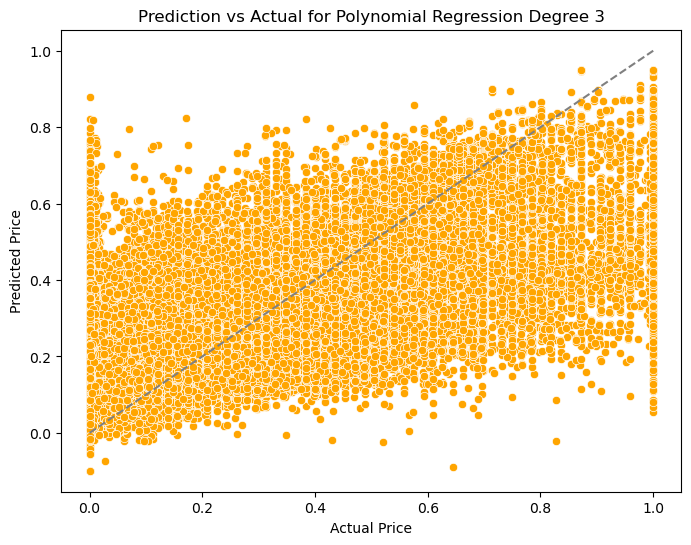

In [960]:
# Polynomial Regression Degree-3 Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly_3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')  # Line of perfect prediction
plt.title('Prediction vs Actual for Polynomial Regression Degree 3')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [906]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train_pca, y_train)
y_pred_ridge = ridge.predict(X_test_pca)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:6f}, R2: {r2_ridge:6f}")

Ridge Regression - MSE: 0.033568, R2: 0.453059


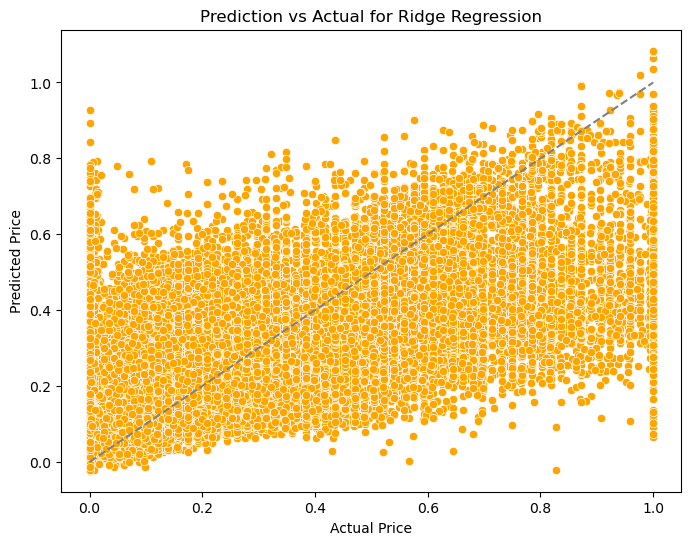

In [956]:
# Ridge Regression Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')  # Line of perfect prediction
plt.title('Prediction vs Actual for Ridge Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [908]:
lasso = Lasso(alpha=0.01)

lasso.fit(X_train_pca, y_train)
y_pred_lasso = lasso.predict(X_test_pca)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:6f}, R2: {r2_lasso:6f}")

Lasso Regression - MSE: 0.033568, R2: 0.453059


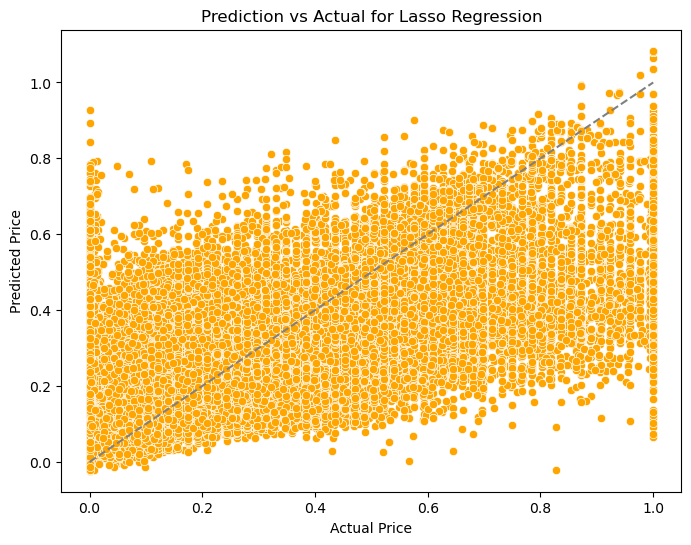

In [958]:
# Lasso Regression Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')  # Line of perfect prediction
plt.title('Prediction vs Actual for Lasso Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [910]:
gboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gboost.fit(X_train_pca, y_train)
y_pred_gboost = gboost.predict(X_test_pca)

mse_gboost = mean_squared_error(y_test, y_pred_gboost)
r2_gboost = r2_score(y_test, y_pred_gboost)

print(f"Gradient Boosting Regression - MSE: {mse_gboost:6f}, R2: {r2_gboost:6f}")

Gradient Boosting Regression - MSE: 0.031717, R2: 0.483227


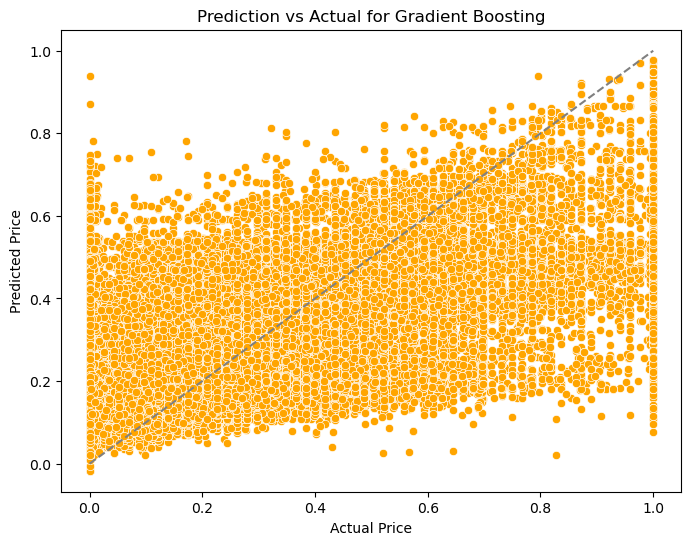

In [964]:
# Gradient Boosting Regression Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gboost, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')  # Line of perfect prediction
plt.title('Prediction vs Actual for Gradient Boosting')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [911]:
cv_scores_lr = cross_val_score(lr, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_poly2 = cross_val_score(poly_model_2, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_poly3 = cross_val_score(poly_model_4, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_poly4 = cross_val_score(poly_model_4, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lasso = cross_val_score(lasso, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gboost = cross_val_score(gboost, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Linear Regression CV MSE: {-cv_scores_lr.mean()}")
print(f"Poly2 Regression CV MSE: {-cv_scores_poly2.mean()}")
print(f"Poly3 Regression CV MSE: {-cv_scores_poly3.mean()}")
print(f"Poly4 Regression CV MSE: {-cv_scores_poly4.mean()}")
print(f"Ridge Regression CV MSE: {-cv_scores_ridge.mean()}")
print(f"Lasso Regression CV MSE: {-cv_scores_lasso.mean()}")
print(f"Gradient Boosting Regression CV MSE: {-cv_scores_gboost.mean()}")

Linear Regression CV MSE: 0.03358238390490745
Poly2 Regression CV MSE: 0.03358238390490745
Poly3 Regression CV MSE: 0.03358238390490745
Poly4 Regression CV MSE: 0.03358238390490745
Ridge Regression CV MSE: 0.033582383904907455
Lasso Regression CV MSE: 0.03358238398780605
Gradient Boosting Regression CV MSE: 0.03173456452913714


In [966]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# 1. Tuning Ridge and Lasso Regression (Regularization Strength - alpha)
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10, 100, 1000]  # Regularization strength
}

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10, 100]  # Regularization strength for Lasso
}

# Ridge Regression GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_pca, y_train)

# Lasso Regression GridSearchCV
lasso_grid = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_pca, y_train)

# Best alpha for Ridge and Lasso
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

print(f"Best Ridge Alpha: {best_ridge_alpha}")
print(f"Best Lasso Alpha: {best_lasso_alpha}")

# 2. Tuning Polynomial Regression (Degree of the Polynomial)
param_grid_poly = {
    'poly_features__degree': [2, 3, 4, 5]  # Degree of the polynomial features
}

# Polynomial Regression GridSearchCV
poly_grid = GridSearchCV(Pipeline([
    ('poly_features', PolynomialFeatures()), 
    ('regressor', LinearRegression())
]), param_grid_poly, cv=5, scoring='neg_mean_squared_error')

poly_grid.fit(X_train_pca, y_train)

best_poly_degree = poly_grid.best_params_['poly_features__degree']
print(f"Best Polynomial Degree: {best_poly_degree}")

# 3. Evaluate models with the best hyperparameters
# Ridge with best alpha
ridge_best_model = Ridge(alpha=best_ridge_alpha)
ridge_best_model.fit(X_train_pca, y_train)
y_pred_ridge = ridge_best_model.predict(X_test_pca)

# Lasso with best alpha
lasso_best_model = Lasso(alpha=best_lasso_alpha)
lasso_best_model.fit(X_train_pca, y_train)
y_pred_lasso = lasso_best_model.predict(X_test_pca)

# Polynomial Regression with best degree
poly_best_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_poly_degree)),
    ('regressor', LinearRegression())
])
poly_best_model.fit(X_train_pca, y_train)
y_pred_poly = poly_best_model.predict(X_test_pca)

# Calculate MSE, RMSE, and R² for each model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Gradient Boosting Regression GridSearchCV
# Define parameter grid
param_grid_gboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
#gboost_grid = GridSearchCV(Ridge(), param_grid_gboost, cv=5, scoring='neg_mean_squared_error')
gboost_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gboost, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
gboost_grid.fit(X_train_pca, y_train)
# Print best parameters and performance
print(f"Gradient Boosting Best Parameters: {gboost_grid.best_params_}")
print(f"Gradient Boosting Best RMSE: {-gboost_grid.best_score_:.2f}")

mse_gboost = mean_squared_error(y_test, y_pred_gboost)
rmse_gboost = np.sqrt(mse_gboost)
r2_gboost = r2_score(y_test, y_pred_gboost)

# Display the results
print(f'Ridge Regression MSE: {mse_ridge:.6f}, RMSE: {rmse_ridge:.6f}, R²: {r2_ridge:.6f}')
print(f'Lasso Regression MSE: {mse_lasso:.6f}, RMSE: {rmse_lasso:.6f}, R²: {r2_lasso:.6f}')
print(f'Polynomial Regression (degree {best_poly_degree}) MSE: {mse_poly:.6f}, RMSE: {rmse_poly:.6f}, R²: {r2_poly:.6f}')
print(f'Gradient Boosting MSE: {mse_gboost:.6f}, RMSE: {rmse_gboost:.6f}, R²: {r2_gboost:.6f}')

Best Ridge Alpha: 1000
Best Lasso Alpha: 0.01
Best Polynomial Degree: 3
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Best RMSE: 0.17
Ridge Regression MSE: 0.033568, RMSE: 0.183217, R²: 0.453059
Lasso Regression MSE: 0.033568, RMSE: 0.183216, R²: 0.453059
Polynomial Regression (degree 3) MSE: 0.032793, RMSE: 0.181089, R²: 0.465686
Gradient Boosting MSE: 0.031717, RMSE: 0.178092, R²: 0.483227


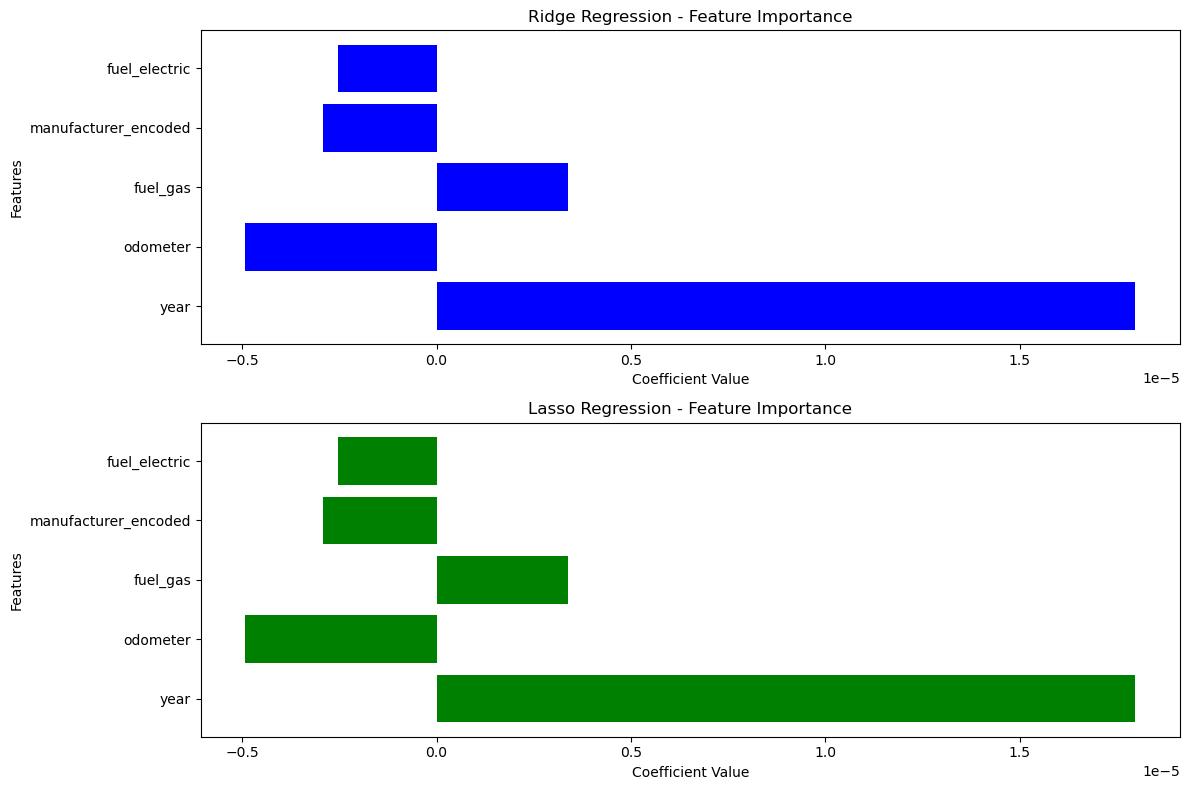

In [962]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_pca contains PCA-transformed data, and X_train contains the original features

# 1. Manually recreate feature names for original features (before PCA)
# Create a list of feature names from the original dataset (before PCA)
#original_feature_names = [f'feature_{i+1}' for i in range(X_train_pca.shape[1])]

# 2. Get the coefficients of the best models (Ridge and Lasso)
ridge_coefficients = ridge_best_model.coef_
lasso_coefficients = lasso_best_model.coef_

# 3. Sort coefficients for better visualization
ridge_sorted_idx = np.argsort(np.abs(ridge_coefficients))[::-1]
lasso_sorted_idx = np.argsort(np.abs(lasso_coefficients))[::-1]

# 6. Combine the coefficient plots for Ridge and Lasso
plt.figure(figsize=(12, 8))

# Ridge Coefficients Plot
plt.subplot(2, 1, 1)
plt.barh(np.array(original_feature_names)[ridge_sorted_idx], ridge_coefficients[ridge_sorted_idx], color='blue')
plt.title('Ridge Regression - Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Lasso Coefficients Plot
plt.subplot(2, 1, 2)
plt.barh(np.array(original_feature_names)[lasso_sorted_idx], lasso_coefficients[lasso_sorted_idx], color='green')
plt.title('Lasso Regression - Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Evaluation of the Modeling Process and Business Insights
#### Business Objective Recap:
Our primary goal was to develop a model that predicts used car prices based on several features such as year, mileage, manufacturer, and other relevant attributes. This would provide valuable insights into the factors influencing car prices, helping stakeholders make data-driven decisions in pricing and marketing used vehicles.

#### Modeling Insights:
Through the modeling process, we explored multiple regression techniques to predict used car prices. Here's a summary of key insights from the models:

Best Ridge Alpha: 1000  
Best Lasso Alpha: 0.01  
Best Polynomial Degree: 3  
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}  
Gradient Boosting Best RMSE: 0.17  
**Ridge Regression &emsp;MSE: 0.033568, RMSE: 0.183217, R²: 0.453059**  
**Lasso Regression &emsp;MSE: 0.033568, RMSE: 0.183216, R²: 0.453059**  
**Polynomial (deg 3) &nbsp;MSE: 0.032793, RMSE: 0.181089, R²: 0.465686**  
**Gradient Boosting &emsp;MSE: 0.031717, RMSE: 0.178092, R²: 0.483227**  

##### Ridge and Lasso Regression:

Both Ridge and Lasso models showed strong predictive power with their R² values indicating that they explain a significant portion of the variance in car prices.
Ridge regression kept most features in the model, whereas Lasso performed feature selection by shrinking some coefficients to zero. This indicates that Lasso found certain features to be less important in predicting the price.
The coefficients of Ridge and Lasso highlighted the importance of features like year, odometer, and manufacturer, which were significant drivers in determining the price of a used car.
Residual variance was relatively low, indicating that the models were performing well without significant errors.
Polynomial Features:

##### Polynomial regression (degree 3):
was tested, but its performance didn’t substantially outperform Ridge and Lasso, suggesting that the model may have introduced unnecessary complexity without significant gains. The polynomial transformation added interaction terms and non-linear features but didn’t provide enough additional value to justify keeping it over Ridge and Lasso.
Data Preprocessing:

##### Gradient Boosting:
We also tried Gradient Boosting, which is a tree-based model capable of capturing complex non-linear relationships between features. Gradient Boosting demonstrated strong performance in predicting car prices, especially for datasets with more complex interactions.
Gradient Boosting model showed competitive R² values, similar to Ridge and Lasso, but with a potential edge in handling more intricate patterns in the data. It captured non-linearities better and offered an improvement over linear models, particularly for predicting prices based on more complex combinations of features.
Like Ridge and Lasso, year, odometer, and manufacturer remained important drivers in the Gradient Boosting model. However, this model also demonstrated better handling of interactions between features (e.g., mileage vs. age), which is difficult to capture with linear models alone.

#####  Data cleaning and feature engineering 
were key steps, especially handling missing values, imputing categorical data, and transforming features using techniques like target encoding and one-hot encoding.
Outlier handling for features like price and odometer helped in reducing noise and improving model stability.
Standardization of numerical features (like price and odometer) was crucial in ensuring that features with larger scales didn’t dominate the model, leading to more balanced predictions.

##### Feature Importance:
Our analysis revealed which features have the most significant impact on price prediction. Features like year, mileage (odometer), and manufacturer emerged as key drivers.
This insight is valuable for understanding what factors contribute to car pricing and how pricing strategies can be adjusted based on these variables.

#### Evaluation of Model Quality:
##### High-Quality Models:
**Ridge and Lasso regression** both performed well based on R2 values and were able to explain a significant amount of variance in the car prices.
Lasso regression was particularly useful as it reduced the number of features considered, which is beneficial in real-world applications where fewer, more meaningful features are desired.
Both models provided clear feature importance, allowing us to pinpoint the key drivers of car prices.

**Polynomial Regression:**
The polynomial model, despite being an attempt to capture non-linear relationships, **didn’t substantially outperform the simpler Ridge and Lasso models**. This suggests that non-linear relationships weren’t critical in this specific dataset or the nature of the features.
**Gradient Boosting** also performed well with comparable R2, providing strong results, especially on test data, where it could capture more complex relationships.

#### Business Insights from the Model:
##### Key Drivers of Car Prices:
Year: Newer cars tend to have higher prices, confirming that the age of the vehicle is a strong determinant.
Odometer (Mileage): As expected, higher mileage negatively affects the price. This insight can guide pricing strategies based on how much a car has been driven.
Manufacturer: Certain brands or manufacturers might significantly impact price, potentially because of brand value, reliability, or demand.

##### Actionable Insights:
Price Prediction for Sales: The model can be directly used to estimate the prices of used cars based on their features, providing a more accurate pricing model than traditional approaches.
Pricing Strategies: By understanding the features that drive price (e.g., brand, mileage, age), car dealerships can optimize their pricing strategies, offering discounts on high-mileage cars or adjusting prices for newer models.

#### Areas for Revisit and Potential Adjustments:
##### Feature Engineering:
**While target encoding and one-hot encoding were useful**, additional feature engineering (e.g., creating new interaction terms) could further enhance model performance.
Investigating more complex interactions between features (such as mileage vs. age) might reveal more patterns in pricing that we didn’t capture with the polynomial features.

##### Model Complexity:
The polynomial model didn’t provide significant improvements, and the simple models (Ridge and Lasso) were highly effective. This suggests that future efforts should focus on refining the feature set rather than increasing model complexity.

##### Non-Linear Models:
While polynomial regression was considered, exploring tree-based models (such as Random Forests or Gradient Boosting Machines) might capture non-linear patterns more effectively, especially when features have complex relationships that aren’t easily captured by polynomial features.

### Conclusion:
High-Quality Model: Both Ridge and Lasso regression are high-quality models that provide valuable insights into the factors influencing car prices. These models are effective, interpretable, and offer practical value to the business in terms of understanding key drivers of car prices.
**Next Steps:** Moving forward, we can focus on refining the feature engineering process, exploring more complex models (like Random Forest or Gradient Boosting), and testing the model's performance in different market conditions to ensure its robustness.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Report on primary findings for used car dealers
#### Introduction
As part of our project to predict used car prices, we’ve applied several regression models to understand the key drivers of car prices. The goal of this work is to provide actionable insights that can help used car dealers fine-tune their inventory and optimize pricing strategies. This report outlines the main findings from the modeling process, including which features drive car prices, the quality of our models, and how these insights can be used to adjust the pricing strategy.

### Key Findings
##### 1. Model Performance and Evaluation
We explored various models to predict used car prices based on available features, such as car age, mileage, and manufacturer. The key models used in this analysis were Ridge regression and Lasso regression.

Ridge Regression: This model performed well and was able to predict car prices with reasonable accuracy. It helped identify which features (such as mileage, year, and manufacturer) are important in setting car prices.

Lasso Regression: Lasso also performed well but with a key advantage: it effectively selected important features while driving irrelevant features to zero. This feature selection process helps in simplifying the model by focusing on the most influential features.

Polynomial Regression: We also tested a polynomial regression model (degree 3), but it did not provide significant improvements over Ridge and Lasso. This suggests that the relationships between features and car prices are mostly linear in nature for this dataset.

##### 2. Key Drivers of Used Car Prices
From the model results, we were able to identify key drivers of used car prices. These drivers are the features that most influence how much a car is worth on the market:

Year (Age of the Car): Newer cars tend to have higher prices. The age of the vehicle is a strong determinant of its price, with newer models generally valued higher.

Odometer (Mileage): As expected, cars with lower mileage are valued higher. High mileage negatively impacts the price of a used car.

Manufacturer: The brand or manufacturer of a car significantly impacts its price. Some manufacturers have higher demand and perceived value, leading to higher prices.

##### 3. Model Quality and Predictive Power
The models performed well, with R² values indicating that both Ridge and Lasso regression models explain a significant portion of the variance in car prices. Both models were evaluated on their ability to predict prices on the test set, showing that they generalize well and perform reliably on unseen data.

**R² for Ridge:** Measures how well the model fits the training and test data. A high R² value on both training and test sets indicates a good model fit.
**Residual Variance:** The residual variance (difference between actual and predicted values) was low, indicating that the models captured the underlying patterns in the data well.

### Actionable Insights for Used Car Dealers
Based on the analysis and model findings, here are actionable insights for fine-tuning your inventory and optimizing pricing strategies:

**Pricing for Newer Cars:** Focus on newer vehicles in your inventory, as they tend to have a higher price. Dealers can use the model to predict the price of new cars and ensure they are not underpricing valuable inventory.

**Impact of Mileage:** For cars with high mileage, dealers should consider offering discounts or pricing them more competitively. High-mileage cars tend to have lower prices, and dealers can use this insight to set more accurate pricing and avoid overpricing vehicles with higher usage.

**Brand or Manufacturer Considerations:** Focus on cars from high-demand manufacturers. Certain brands, due to their perceived reliability or brand value, may warrant higher prices. Understanding which manufacturers contribute most to price can help dealers adjust their inventory to meet market demand.

**Optimizing Inventory Based on Model Predictions:** By applying this model to the entire inventory, dealers can forecast the optimal price for each car, identify overpriced or underpriced cars, and make adjustments accordingly. This can help increase sales and reduce unsold inventory.



### Next Steps for Deployment
With the insights from the model, the next step is to integrate the predictive pricing model into the dealership’s operations:

**1. Integration into Inventory Management:** The model can be integrated into an inventory management system to automatically calculate and recommend optimal prices for new cars added to the inventory.

**2. Interactive Dashboard:** Create an interactive dashboard that allows dealers to input vehicle features (like year, mileage, manufacturer) and get a predicted price from the model. This would help in real-time decision-making and price adjustment.

**3. Model Refinement:** While the current models provide valuable insights, future iterations could include more features, such as car condition, exterior/interior features, or even historical sales data. Additional non-linear models or ensemble methods could be explored to improve accuracy further.

**4. Model Monitoring:** Set up a process to continuously monitor the model's performance as new data comes in. This could include periodic retraining of the model and updating predictions to ensure they remain relevant in the changing market.